In [51]:
using DataFrames, FileIO, DelimitedFiles
using Plots, Optim, LsqFit, JUMD
using Statistics, NamedArrays

In [104]:
# Get ready
dir_eol_hbo = "/home/pbarletta/labo/20/cph_obp/run/eol/hbond"

aa = 120
nstlim = 19500
phs = collect(30:5:75)
idx = collect(1:10)
pdt_steps = collect(0:1:7)
titratable_cnt = 36
titratable_resis = [4, 5, 7, 11, 13, 18, 20, 24, 27, 30, 33, 37, 39,
    40, 41, 42, 48, 52, 58, 59, 64, 69, 73, 77, 78, 82, 87, 93, 94,
    97, 99, 102, 109, 111, 114, 117];
titratable_resnames = ["GL4", "GL4", "LYS", "HIP", "GL4", "LYS", "GL4", "AS4", "LYS",
    "AS4", "GL4", "AS4", "GL4", "AS4", "LYS", "LYS", "GL4", "LYS",
    "AS4", "LYS", "LYS", "LYS", "GL4", "AS4", "GL4", "LYS", "AS4",
    "GL4", "GL4", "HIP", "LYS", "LYS", "LYS", "LYS", "LYS", "AS4"]

idx_of_titratable = fill(0, aa)
[ idx_of_titratable[titratable_resis[i]] = i for i in 1:titratable_cnt ];

titratable_residues = [ string(titratable_resnames[i], "_", titratable_resis[i]) 
    for i in 1:titratable_cnt ];

In [53]:
for i in 1:10
    global nhb_eol_idx = convert(Array{Float64, 1}, readdlm(joinpath(dir_eol_hbo, string(idx[i]),
            string("nhb_eol_", idx[i])))[2:end, 2])
    global nhb_eol_phs = convert(Array{Float64, 1}, readdlm(joinpath(dir_eol_hbo, string(phs[i], "ph"),
            string("nhb_eol_", phs[i])))[2:end, 2])

    sym_nhb_eol_idx = Symbol("nhb_eol_", idx[i])
    sym_nhb_eol_phs = Symbol("nhb_eol_", phs[i])
    eval(:($sym_nhb_eol_idx = nhb_eol_idx))
    eval(:($sym_nhb_eol_phs = nhb_eol_phs))
end

## hbonds count por pH

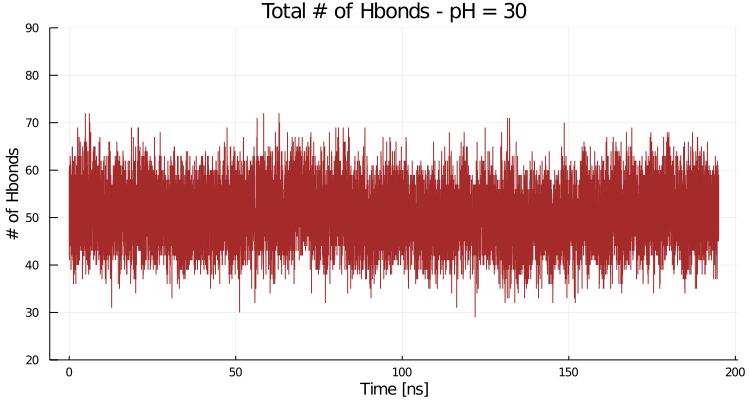

In [54]:
min_nhb = 20
    max_nhb = 90
    plot(collect(1:nstlim) ./ 100, nhb_eol_30,
        title = string("Total # of Hbonds - pH = ",30), size = (750, 400),
        ylims = (min_nhb, max_nhb), label = false,
        linecolor = Colors.colorant"Brown",
        yaxis = "# of Hbonds", xaxis = "Time [ns]")

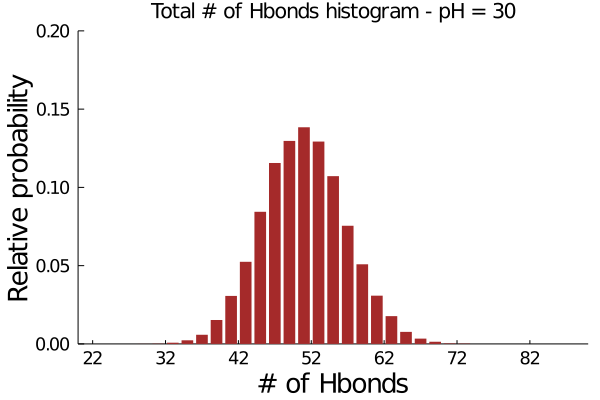

In [55]:
st = 2
    bin_nhb = collect(min_nhb:st:max_nhb)
    wgh_nhb = fill(1.0, length(nhb_eol_30))
    
    # Histograma ponderado
    Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_eol_30, bin_nhb, wgh_nhb, true, false);
    
    bar(Wbins_nhb, Whis_nhb,
        xlims = (min_nhb, max_nhb), ylims = (0, .2),
        xticks = min_nhb+st:10:max_nhb+st,
        linecolor = false, fillcolor = Colors.colorant"Brown",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"),
        title = string("Total # of Hbonds histogram - pH = ",30),
        yaxis = "Relative probability", xaxis = "# of Hbonds")

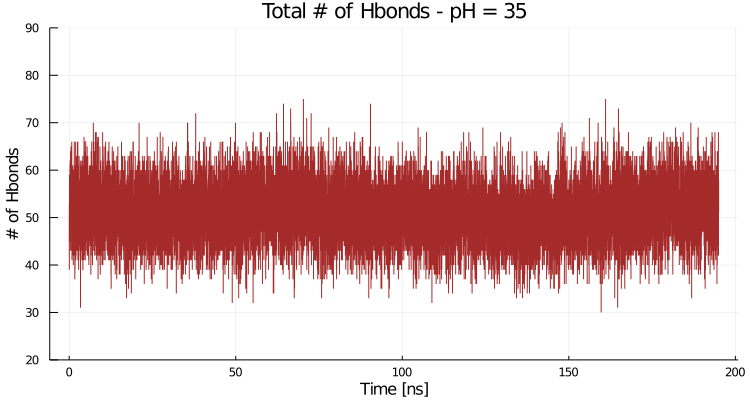

In [56]:
min_nhb = 20
    max_nhb = 90
    plot(collect(1:nstlim) ./ 100, nhb_eol_35,
        title = string("Total # of Hbonds - pH = ",35), size = (750, 400),
        ylims = (min_nhb, max_nhb), label = false,
        linecolor = Colors.colorant"Brown",
        yaxis = "# of Hbonds", xaxis = "Time [ns]")

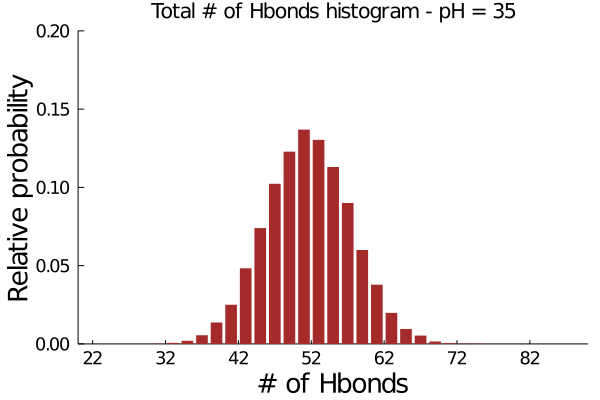

In [57]:
st = 2
    bin_nhb = collect(min_nhb:st:max_nhb)
    wgh_nhb = fill(1.0, length(nhb_eol_35))
    
    # Histograma ponderado
    Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_eol_35, bin_nhb, wgh_nhb, true, false);
    
    bar(Wbins_nhb, Whis_nhb,
        xlims = (min_nhb, max_nhb), ylims = (0, .2),
        xticks = min_nhb+st:10:max_nhb+st,
        linecolor = false, fillcolor = Colors.colorant"Brown",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"),
        title = string("Total # of Hbonds histogram - pH = ",35),
        yaxis = "Relative probability", xaxis = "# of Hbonds")

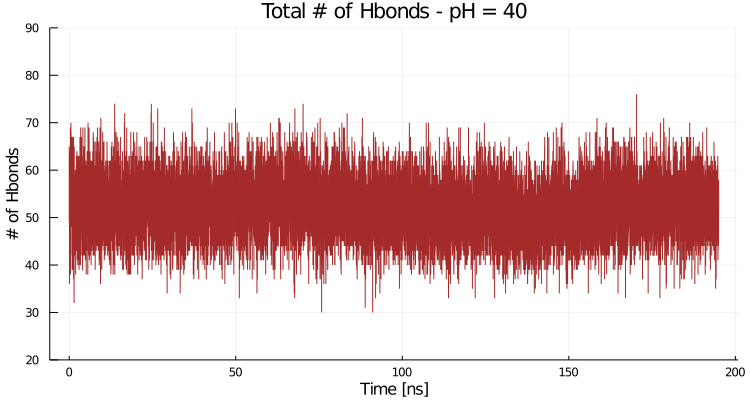

In [58]:
min_nhb = 20
    max_nhb = 90
    plot(collect(1:nstlim) ./ 100, nhb_eol_40,
        title = string("Total # of Hbonds - pH = ",40), size = (750, 400),
        ylims = (min_nhb, max_nhb), label = false,
        linecolor = Colors.colorant"Brown",
        yaxis = "# of Hbonds", xaxis = "Time [ns]")

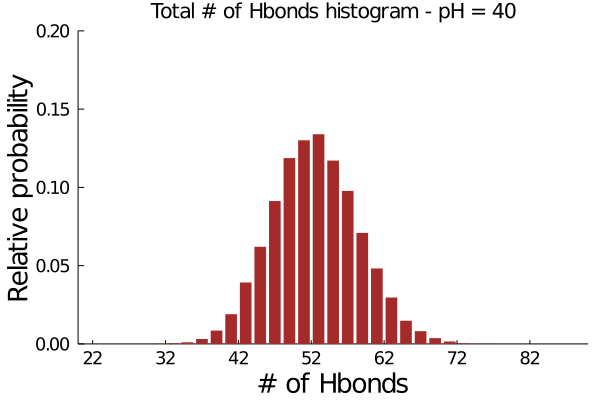

In [59]:
st = 2
    bin_nhb = collect(min_nhb:st:max_nhb)
    wgh_nhb = fill(1.0, length(nhb_eol_40))
    
    # Histograma ponderado
    Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_eol_40, bin_nhb, wgh_nhb, true, false);
    
    bar(Wbins_nhb, Whis_nhb,
        xlims = (min_nhb, max_nhb), ylims = (0, .2),
        xticks = min_nhb+st:10:max_nhb+st,
        linecolor = false, fillcolor = Colors.colorant"Brown",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"),
        title = string("Total # of Hbonds histogram - pH = ",40),
        yaxis = "Relative probability", xaxis = "# of Hbonds")

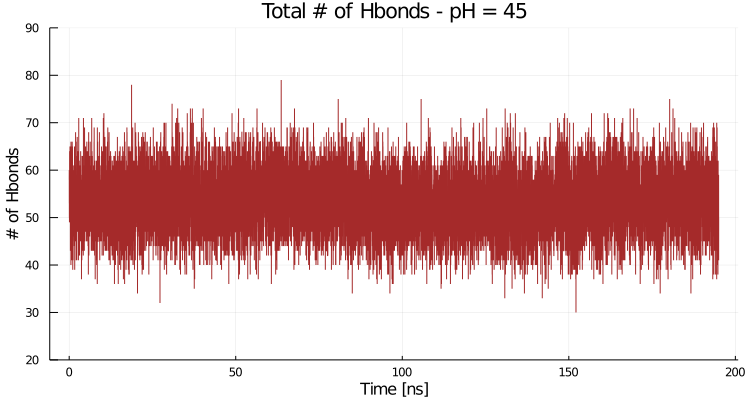

In [60]:
min_nhb = 20
    max_nhb = 90
    plot(collect(1:nstlim) ./ 100, nhb_eol_45,
        title = string("Total # of Hbonds - pH = ",45), size = (750, 400),
        ylims = (min_nhb, max_nhb), label = false,
        linecolor = Colors.colorant"Brown",
        yaxis = "# of Hbonds", xaxis = "Time [ns]")

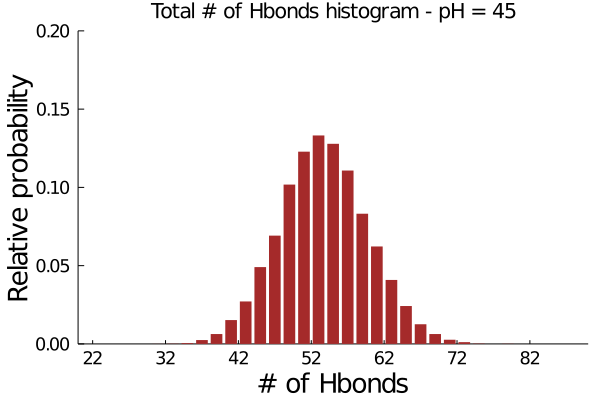

In [61]:
st = 2
    bin_nhb = collect(min_nhb:st:max_nhb)
    wgh_nhb = fill(1.0, length(nhb_eol_45))
    
    # Histograma ponderado
    Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_eol_45, bin_nhb, wgh_nhb, true, false);
    
    bar(Wbins_nhb, Whis_nhb,
        xlims = (min_nhb, max_nhb), ylims = (0, .2),
        xticks = min_nhb+st:10:max_nhb+st,
        linecolor = false, fillcolor = Colors.colorant"Brown",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"),
        title = string("Total # of Hbonds histogram - pH = ",45),
        yaxis = "Relative probability", xaxis = "# of Hbonds")

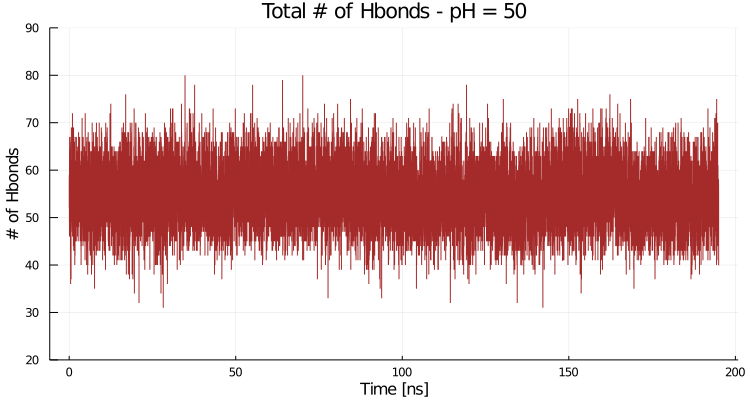

In [62]:
min_nhb = 20
    max_nhb = 90
    plot(collect(1:nstlim) ./ 100, nhb_eol_50,
        title = string("Total # of Hbonds - pH = ",50), size = (750, 400),
        ylims = (min_nhb, max_nhb), label = false,
        linecolor = Colors.colorant"Brown",
        yaxis = "# of Hbonds", xaxis = "Time [ns]")

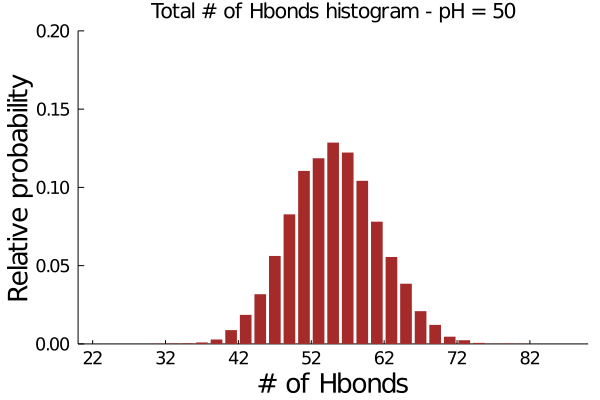

In [63]:
st = 2
    bin_nhb = collect(min_nhb:st:max_nhb)
    wgh_nhb = fill(1.0, length(nhb_eol_50))
    
    # Histograma ponderado
    Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_eol_50, bin_nhb, wgh_nhb, true, false);
    
    bar(Wbins_nhb, Whis_nhb,
        xlims = (min_nhb, max_nhb), ylims = (0, .2),
        xticks = min_nhb+st:10:max_nhb+st,
        linecolor = false, fillcolor = Colors.colorant"Brown",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"),
        title = string("Total # of Hbonds histogram - pH = ",50),
        yaxis = "Relative probability", xaxis = "# of Hbonds")

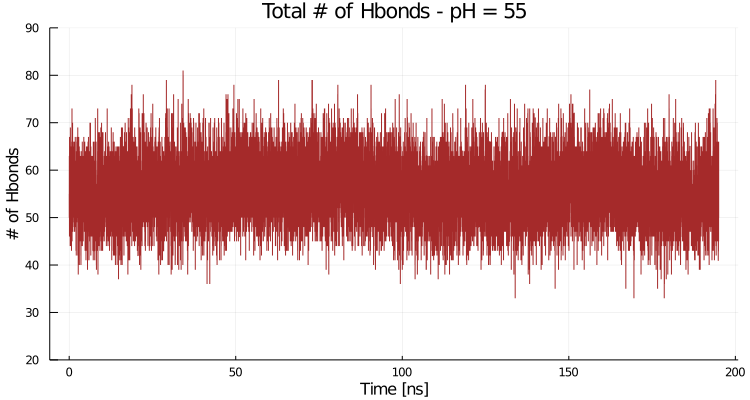

In [64]:
min_nhb = 20
    max_nhb = 90
    plot(collect(1:nstlim) ./ 100, nhb_eol_55,
        title = string("Total # of Hbonds - pH = ",55), size = (750, 400),
        ylims = (min_nhb, max_nhb), label = false,
        linecolor = Colors.colorant"Brown",
        yaxis = "# of Hbonds", xaxis = "Time [ns]")

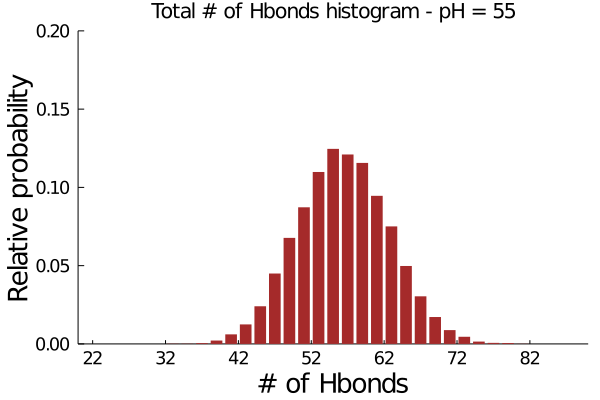

In [65]:
st = 2
    bin_nhb = collect(min_nhb:st:max_nhb)
    wgh_nhb = fill(1.0, length(nhb_eol_55))
    
    # Histograma ponderado
    Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_eol_55, bin_nhb, wgh_nhb, true, false);
    
    bar(Wbins_nhb, Whis_nhb,
        xlims = (min_nhb, max_nhb), ylims = (0, .2),
        xticks = min_nhb+st:10:max_nhb+st,
        linecolor = false, fillcolor = Colors.colorant"Brown",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"),
        title = string("Total # of Hbonds histogram - pH = ",55),
        yaxis = "Relative probability", xaxis = "# of Hbonds")

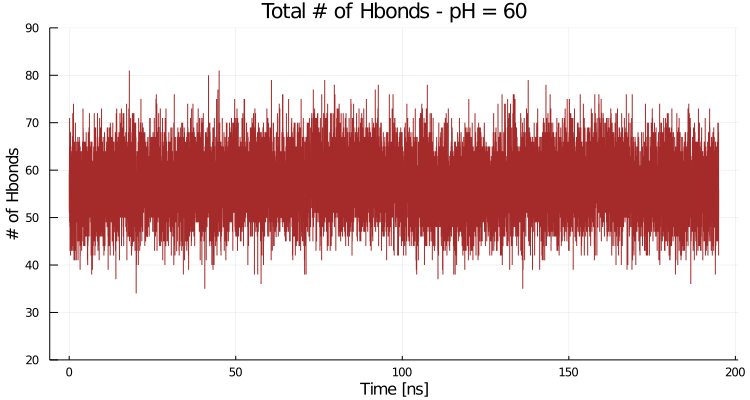

In [66]:
min_nhb = 20
    max_nhb = 90
    plot(collect(1:nstlim) ./ 100, nhb_eol_60,
        title = string("Total # of Hbonds - pH = ",60), size = (750, 400),
        ylims = (min_nhb, max_nhb), label = false,
        linecolor = Colors.colorant"Brown",
        yaxis = "# of Hbonds", xaxis = "Time [ns]")

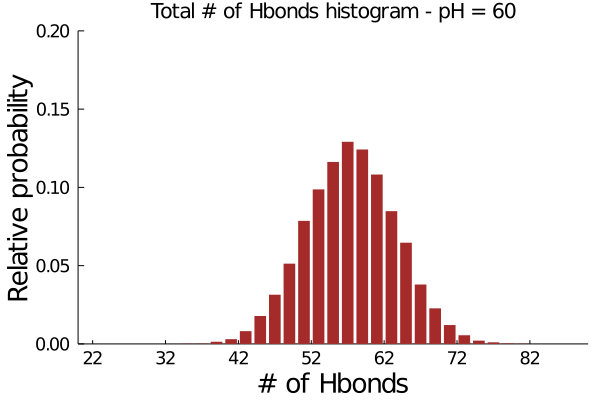

In [67]:
st = 2
    bin_nhb = collect(min_nhb:st:max_nhb)
    wgh_nhb = fill(1.0, length(nhb_eol_60))
    
    # Histograma ponderado
    Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_eol_60, bin_nhb, wgh_nhb, true, false);
    
    bar(Wbins_nhb, Whis_nhb,
        xlims = (min_nhb, max_nhb), ylims = (0, .2),
        xticks = min_nhb+st:10:max_nhb+st,
        linecolor = false, fillcolor = Colors.colorant"Brown",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"),
        title = string("Total # of Hbonds histogram - pH = ",60),
        yaxis = "Relative probability", xaxis = "# of Hbonds")

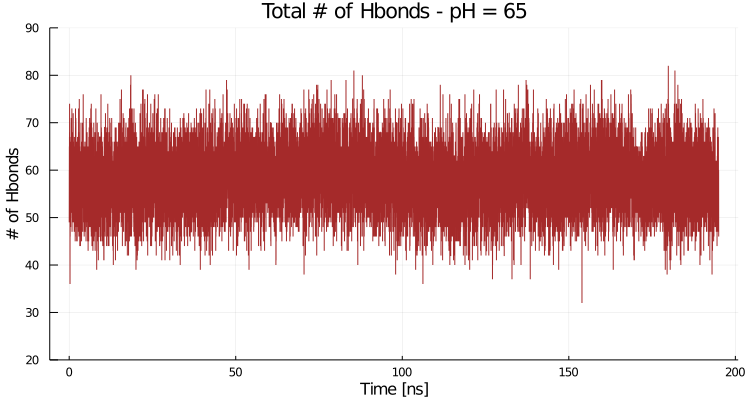

In [68]:
min_nhb = 20
    max_nhb = 90
    plot(collect(1:nstlim) ./ 100, nhb_eol_65,
        title = string("Total # of Hbonds - pH = ",65), size = (750, 400),
        ylims = (min_nhb, max_nhb), label = false,
        linecolor = Colors.colorant"Brown",
        yaxis = "# of Hbonds", xaxis = "Time [ns]")

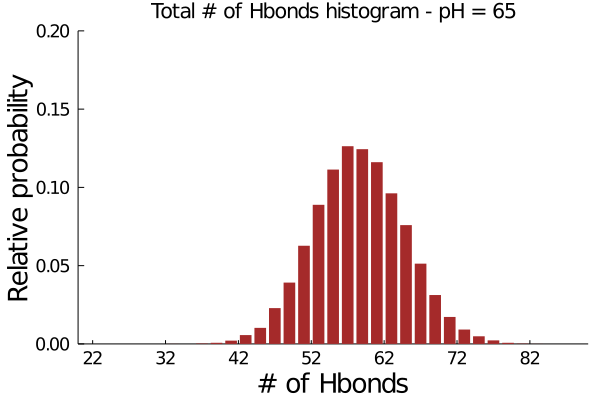

In [69]:
st = 2
    bin_nhb = collect(min_nhb:st:max_nhb)
    wgh_nhb = fill(1.0, length(nhb_eol_65))
    
    # Histograma ponderado
    Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_eol_65, bin_nhb, wgh_nhb, true, false);
    
    bar(Wbins_nhb, Whis_nhb,
        xlims = (min_nhb, max_nhb), ylims = (0, .2),
        xticks = min_nhb+st:10:max_nhb+st,
        linecolor = false, fillcolor = Colors.colorant"Brown",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"),
        title = string("Total # of Hbonds histogram - pH = ",65),
        yaxis = "Relative probability", xaxis = "# of Hbonds")

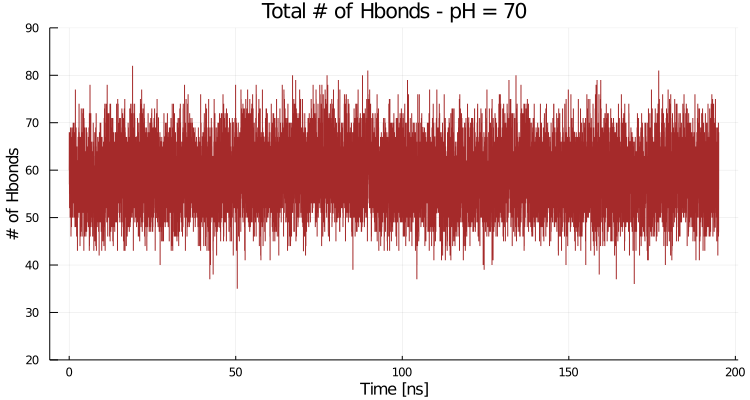

In [70]:
min_nhb = 20
    max_nhb = 90
    plot(collect(1:nstlim) ./ 100, nhb_eol_70,
        title = string("Total # of Hbonds - pH = ",70), size = (750, 400),
        ylims = (min_nhb, max_nhb), label = false,
        linecolor = Colors.colorant"Brown",
        yaxis = "# of Hbonds", xaxis = "Time [ns]")

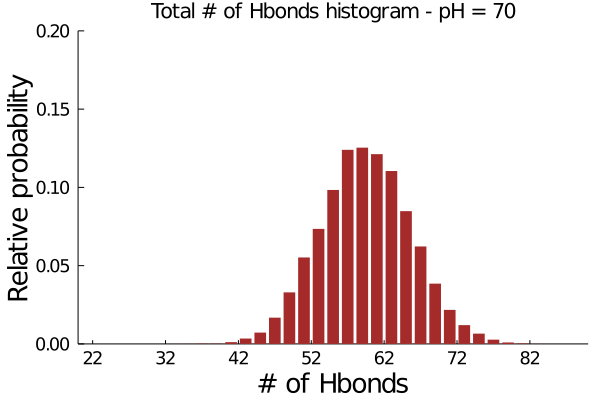

In [71]:
st = 2
    bin_nhb = collect(min_nhb:st:max_nhb)
    wgh_nhb = fill(1.0, length(nhb_eol_70))
    
    # Histograma ponderado
    Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_eol_70, bin_nhb, wgh_nhb, true, false);
    
    bar(Wbins_nhb, Whis_nhb,
        xlims = (min_nhb, max_nhb), ylims = (0, .2),
        xticks = min_nhb+st:10:max_nhb+st,
        linecolor = false, fillcolor = Colors.colorant"Brown",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"),
        title = string("Total # of Hbonds histogram - pH = ",70),
        yaxis = "Relative probability", xaxis = "# of Hbonds")

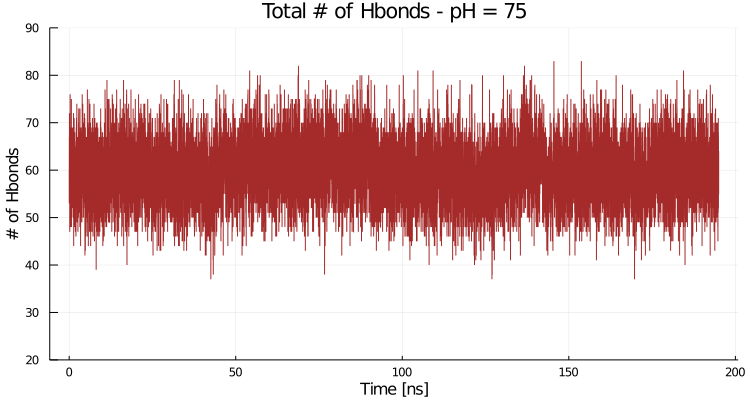

In [72]:
min_nhb = 20
    max_nhb = 90
    plot(collect(1:nstlim) ./ 100, nhb_eol_75,
        title = string("Total # of Hbonds - pH = ",75), size = (750, 400),
        ylims = (min_nhb, max_nhb), label = false,
        linecolor = Colors.colorant"Brown",
        yaxis = "# of Hbonds", xaxis = "Time [ns]")

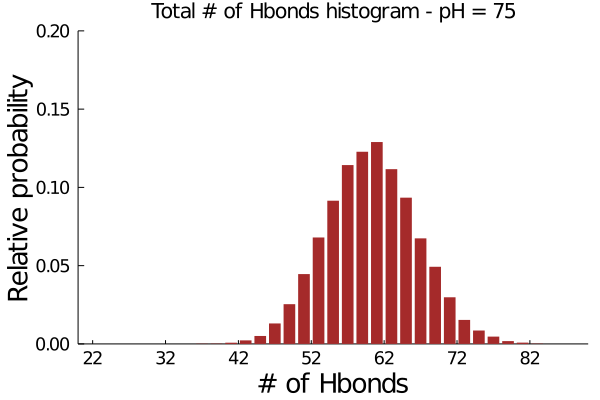

In [73]:
st = 2
    bin_nhb = collect(min_nhb:st:max_nhb)
    wgh_nhb = fill(1.0, length(nhb_eol_75))
    
    # Histograma ponderado
    Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_eol_75, bin_nhb, wgh_nhb, true, false);
    
    bar(Wbins_nhb, Whis_nhb,
        xlims = (min_nhb, max_nhb), ylims = (0, .2),
        xticks = min_nhb+st:10:max_nhb+st,
        linecolor = false, fillcolor = Colors.colorant"Brown",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"),
        title = string("Total # of Hbonds histogram - pH = ",75),
        yaxis = "Relative probability", xaxis = "# of Hbonds")

In [74]:
vals = vcat([ mean(nhb_eol_30) std(nhb_eol_30) std(nhb_eol_30) / mean(nhb_eol_30) ],
[ mean(nhb_eol_35) std(nhb_eol_35) std(nhb_eol_35) / mean(nhb_eol_35) ],
[ mean(nhb_eol_40) std(nhb_eol_40) std(nhb_eol_40) / mean(nhb_eol_40) ],
[ mean(nhb_eol_45) std(nhb_eol_45) std(nhb_eol_45) / mean(nhb_eol_45) ],
[ mean(nhb_eol_50) std(nhb_eol_50) std(nhb_eol_50) / mean(nhb_eol_50) ],
[ mean(nhb_eol_55) std(nhb_eol_55) std(nhb_eol_55) / mean(nhb_eol_55) ],
[ mean(nhb_eol_60) std(nhb_eol_60) std(nhb_eol_60) / mean(nhb_eol_60) ],
[ mean(nhb_eol_65) std(nhb_eol_65) std(nhb_eol_65) / mean(nhb_eol_65) ],
[ mean(nhb_eol_70) std(nhb_eol_70) std(nhb_eol_70) / mean(nhb_eol_70) ],
[ mean(nhb_eol_75) std(nhb_eol_75) std(nhb_eol_75) / mean(nhb_eol_75) ])

NamedArray(vals, (string.(phs), ["μ" ; "std" ; "μ/std"]))

10×3 Named Array{Float64,2}
A ╲ B │        μ       std     μ/std
──────┼─────────────────────────────
30    │  50.4938   5.71987  0.113279
35    │  51.0941   5.81686  0.113846
40    │  52.0285   5.91574  0.113702
45    │  53.1896   6.03689  0.113498
50    │  54.6539   6.13887  0.112323
55    │  55.9041   6.28276  0.112385
60    │   56.957   6.16931  0.108315
65    │  58.0753    6.2221  0.107139
70    │  58.9466   6.17411  0.104741
75    │  59.7566   6.24195  0.104456

## hbonds count por idx

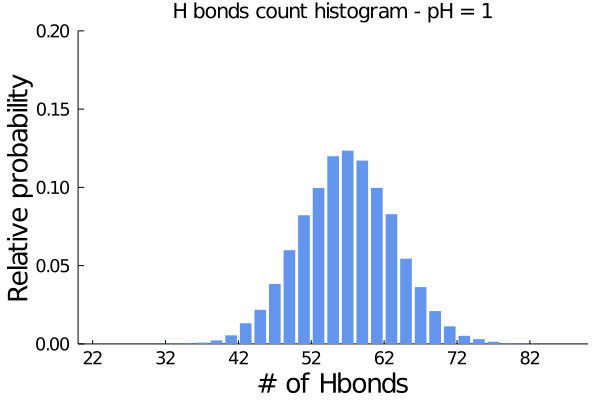

In [75]:
st = 2
    bin_nhb = collect(min_nhb:st:max_nhb)
    wgh_nhb = fill(1.0, length(nhb_eol_1))
    
    # Histograma ponderado
    Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_eol_1, bin_nhb, wgh_nhb, true, false);
    
    bar(Wbins_nhb, Whis_nhb,
        xlims = (min_nhb, max_nhb), ylims = (0, .2),
        xticks = min_nhb+st:10:max_nhb+st,
        linecolor = false, fillcolor = Colors.colorant"CornflowerBlue",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"),
        title = string("H bonds count histogram - pH = ", 1),
        yaxis = "Relative probability", xaxis = "# of Hbonds")

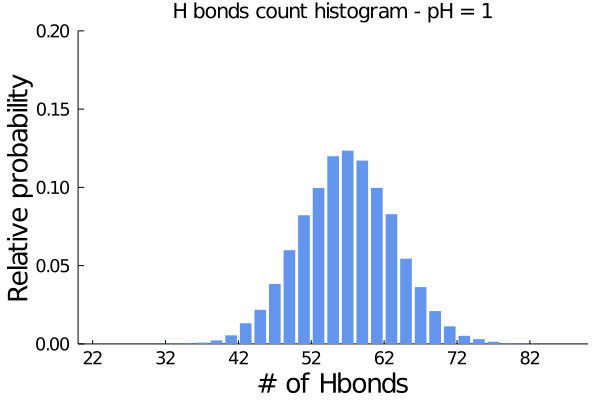

In [76]:
st = 2
    bin_nhb = collect(min_nhb:st:max_nhb)
    wgh_nhb = fill(1.0, length(nhb_eol_1))
    
    # Histograma ponderado
    Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_eol_1, bin_nhb, wgh_nhb, true, false);
    
    bar(Wbins_nhb, Whis_nhb,
        xlims = (min_nhb, max_nhb), ylims = (0, .2),
        xticks = min_nhb+st:10:max_nhb+st,
        linecolor = false, fillcolor = Colors.colorant"CornflowerBlue",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"),
        title = string("H bonds count histogram - pH = ", 1),
        yaxis = "Relative probability", xaxis = "# of Hbonds")

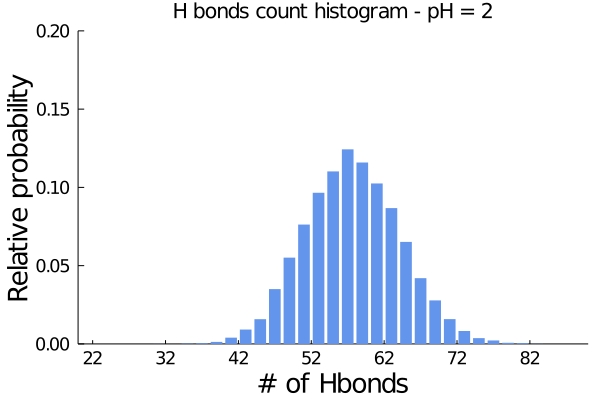

In [77]:
st = 2
    bin_nhb = collect(min_nhb:st:max_nhb)
    wgh_nhb = fill(1.0, length(nhb_eol_2))
    
    # Histograma ponderado
    Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_eol_2, bin_nhb, wgh_nhb, true, false);
    
    bar(Wbins_nhb, Whis_nhb,
        xlims = (min_nhb, max_nhb), ylims = (0, .2),
        xticks = min_nhb+st:10:max_nhb+st,
        linecolor = false, fillcolor = Colors.colorant"CornflowerBlue",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"),
        title = string("H bonds count histogram - pH = ", 2),
        yaxis = "Relative probability", xaxis = "# of Hbonds")

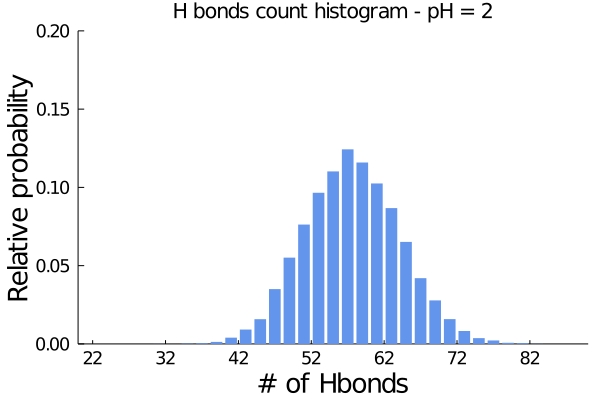

In [78]:
st = 2
    bin_nhb = collect(min_nhb:st:max_nhb)
    wgh_nhb = fill(1.0, length(nhb_eol_2))
    
    # Histograma ponderado
    Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_eol_2, bin_nhb, wgh_nhb, true, false);
    
    bar(Wbins_nhb, Whis_nhb,
        xlims = (min_nhb, max_nhb), ylims = (0, .2),
        xticks = min_nhb+st:10:max_nhb+st,
        linecolor = false, fillcolor = Colors.colorant"CornflowerBlue",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"),
        title = string("H bonds count histogram - pH = ", 2),
        yaxis = "Relative probability", xaxis = "# of Hbonds")

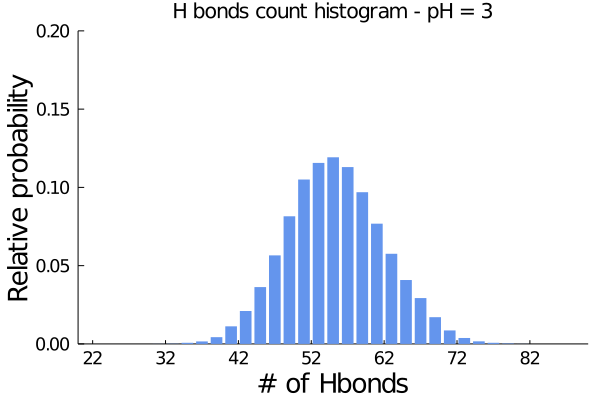

In [79]:
st = 2
    bin_nhb = collect(min_nhb:st:max_nhb)
    wgh_nhb = fill(1.0, length(nhb_eol_3))
    
    # Histograma ponderado
    Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_eol_3, bin_nhb, wgh_nhb, true, false);
    
    bar(Wbins_nhb, Whis_nhb,
        xlims = (min_nhb, max_nhb), ylims = (0, .2),
        xticks = min_nhb+st:10:max_nhb+st,
        linecolor = false, fillcolor = Colors.colorant"CornflowerBlue",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"),
        title = string("H bonds count histogram - pH = ", 3),
        yaxis = "Relative probability", xaxis = "# of Hbonds")

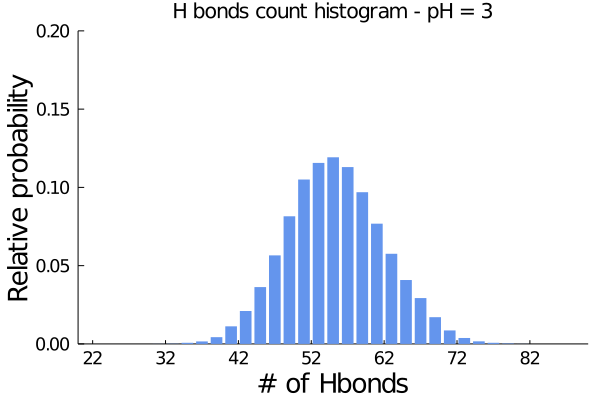

In [80]:
st = 2
    bin_nhb = collect(min_nhb:st:max_nhb)
    wgh_nhb = fill(1.0, length(nhb_eol_3))
    
    # Histograma ponderado
    Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_eol_3, bin_nhb, wgh_nhb, true, false);
    
    bar(Wbins_nhb, Whis_nhb,
        xlims = (min_nhb, max_nhb), ylims = (0, .2),
        xticks = min_nhb+st:10:max_nhb+st,
        linecolor = false, fillcolor = Colors.colorant"CornflowerBlue",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"),
        title = string("H bonds count histogram - pH = ", 3),
        yaxis = "Relative probability", xaxis = "# of Hbonds")

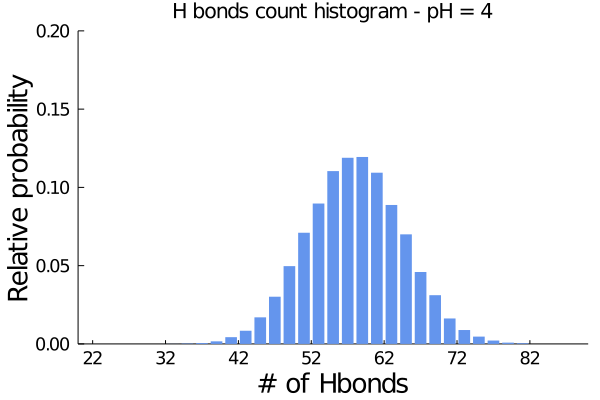

In [81]:
st = 2
    bin_nhb = collect(min_nhb:st:max_nhb)
    wgh_nhb = fill(1.0, length(nhb_eol_4))
    
    # Histograma ponderado
    Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_eol_4, bin_nhb, wgh_nhb, true, false);
    
    bar(Wbins_nhb, Whis_nhb,
        xlims = (min_nhb, max_nhb), ylims = (0, .2),
        xticks = min_nhb+st:10:max_nhb+st,
        linecolor = false, fillcolor = Colors.colorant"CornflowerBlue",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"),
        title = string("H bonds count histogram - pH = ", 4),
        yaxis = "Relative probability", xaxis = "# of Hbonds")

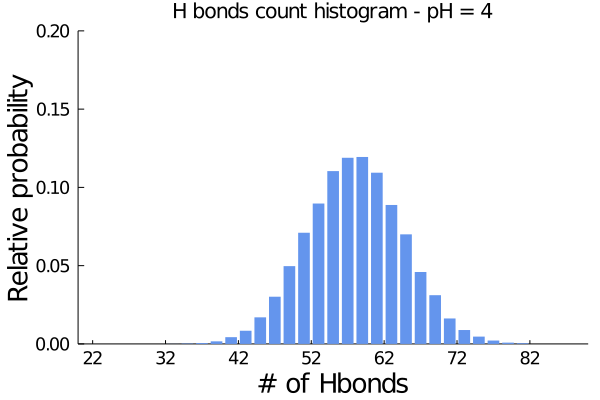

In [82]:
st = 2
    bin_nhb = collect(min_nhb:st:max_nhb)
    wgh_nhb = fill(1.0, length(nhb_eol_4))
    
    # Histograma ponderado
    Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_eol_4, bin_nhb, wgh_nhb, true, false);
    
    bar(Wbins_nhb, Whis_nhb,
        xlims = (min_nhb, max_nhb), ylims = (0, .2),
        xticks = min_nhb+st:10:max_nhb+st,
        linecolor = false, fillcolor = Colors.colorant"CornflowerBlue",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"),
        title = string("H bonds count histogram - pH = ", 4),
        yaxis = "Relative probability", xaxis = "# of Hbonds")

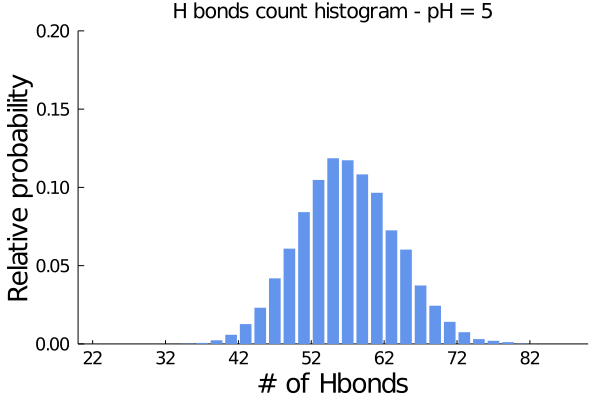

In [83]:
st = 2
    bin_nhb = collect(min_nhb:st:max_nhb)
    wgh_nhb = fill(1.0, length(nhb_eol_5))
    
    # Histograma ponderado
    Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_eol_5, bin_nhb, wgh_nhb, true, false);
    
    bar(Wbins_nhb, Whis_nhb,
        xlims = (min_nhb, max_nhb), ylims = (0, .2),
        xticks = min_nhb+st:10:max_nhb+st,
        linecolor = false, fillcolor = Colors.colorant"CornflowerBlue",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"),
        title = string("H bonds count histogram - pH = ", 5),
        yaxis = "Relative probability", xaxis = "# of Hbonds")

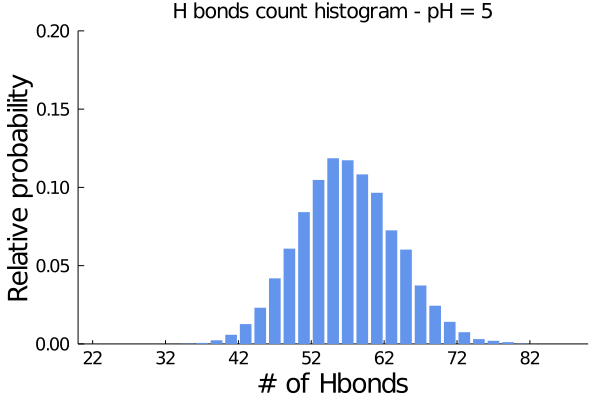

In [84]:
st = 2
    bin_nhb = collect(min_nhb:st:max_nhb)
    wgh_nhb = fill(1.0, length(nhb_eol_5))
    
    # Histograma ponderado
    Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_eol_5, bin_nhb, wgh_nhb, true, false);
    
    bar(Wbins_nhb, Whis_nhb,
        xlims = (min_nhb, max_nhb), ylims = (0, .2),
        xticks = min_nhb+st:10:max_nhb+st,
        linecolor = false, fillcolor = Colors.colorant"CornflowerBlue",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"),
        title = string("H bonds count histogram - pH = ", 5),
        yaxis = "Relative probability", xaxis = "# of Hbonds")

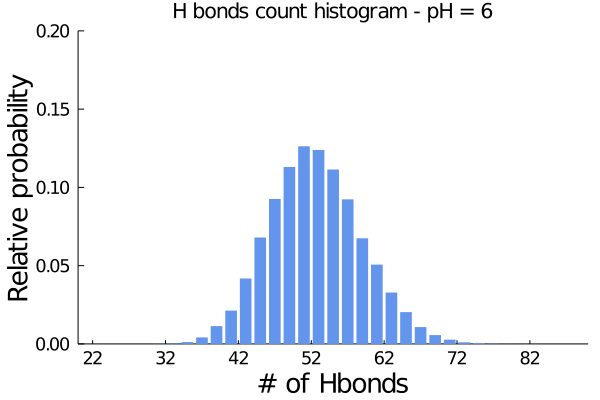

In [85]:
st = 2
    bin_nhb = collect(min_nhb:st:max_nhb)
    wgh_nhb = fill(1.0, length(nhb_eol_6))
    
    # Histograma ponderado
    Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_eol_6, bin_nhb, wgh_nhb, true, false);
    
    bar(Wbins_nhb, Whis_nhb,
        xlims = (min_nhb, max_nhb), ylims = (0, .2),
        xticks = min_nhb+st:10:max_nhb+st,
        linecolor = false, fillcolor = Colors.colorant"CornflowerBlue",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"),
        title = string("H bonds count histogram - pH = ", 6),
        yaxis = "Relative probability", xaxis = "# of Hbonds")

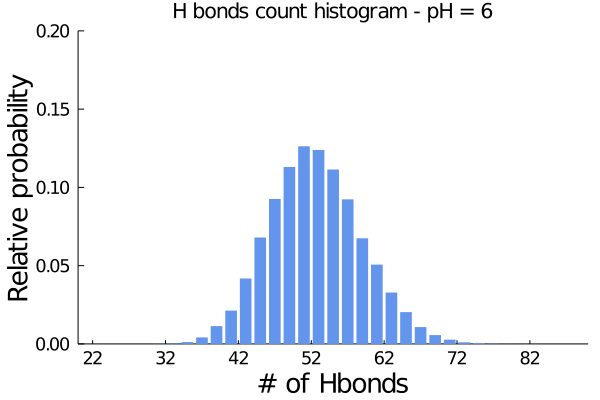

In [86]:
st = 2
    bin_nhb = collect(min_nhb:st:max_nhb)
    wgh_nhb = fill(1.0, length(nhb_eol_6))
    
    # Histograma ponderado
    Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_eol_6, bin_nhb, wgh_nhb, true, false);
    
    bar(Wbins_nhb, Whis_nhb,
        xlims = (min_nhb, max_nhb), ylims = (0, .2),
        xticks = min_nhb+st:10:max_nhb+st,
        linecolor = false, fillcolor = Colors.colorant"CornflowerBlue",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"),
        title = string("H bonds count histogram - pH = ", 6),
        yaxis = "Relative probability", xaxis = "# of Hbonds")

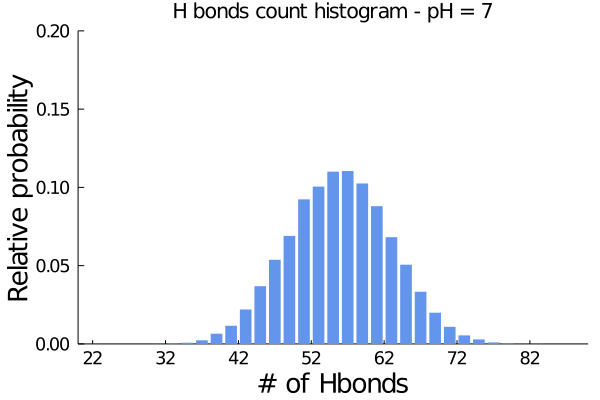

In [87]:
st = 2
    bin_nhb = collect(min_nhb:st:max_nhb)
    wgh_nhb = fill(1.0, length(nhb_eol_7))
    
    # Histograma ponderado
    Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_eol_7, bin_nhb, wgh_nhb, true, false);
    
    bar(Wbins_nhb, Whis_nhb,
        xlims = (min_nhb, max_nhb), ylims = (0, .2),
        xticks = min_nhb+st:10:max_nhb+st,
        linecolor = false, fillcolor = Colors.colorant"CornflowerBlue",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"),
        title = string("H bonds count histogram - pH = ", 7),
        yaxis = "Relative probability", xaxis = "# of Hbonds")

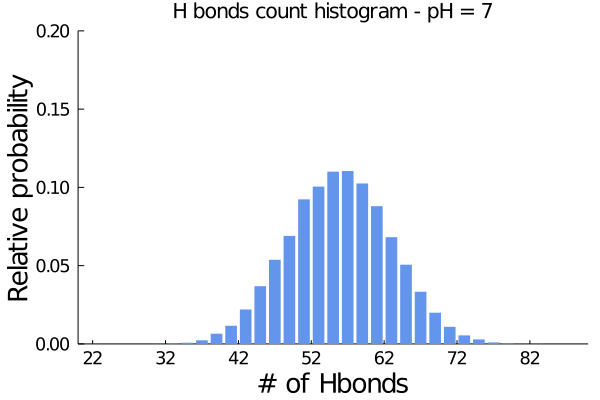

In [88]:
st = 2
    bin_nhb = collect(min_nhb:st:max_nhb)
    wgh_nhb = fill(1.0, length(nhb_eol_7))
    
    # Histograma ponderado
    Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_eol_7, bin_nhb, wgh_nhb, true, false);
    
    bar(Wbins_nhb, Whis_nhb,
        xlims = (min_nhb, max_nhb), ylims = (0, .2),
        xticks = min_nhb+st:10:max_nhb+st,
        linecolor = false, fillcolor = Colors.colorant"CornflowerBlue",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"),
        title = string("H bonds count histogram - pH = ", 7),
        yaxis = "Relative probability", xaxis = "# of Hbonds")

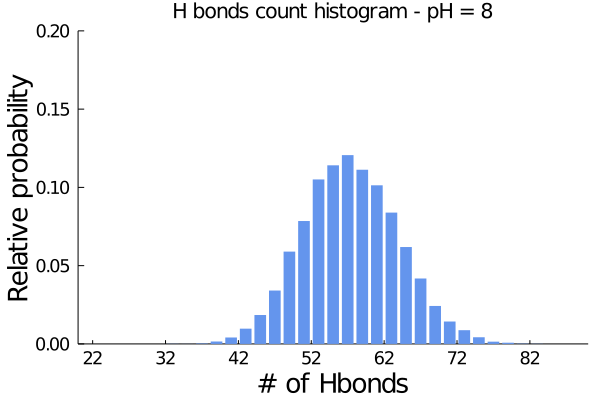

In [89]:
st = 2
    bin_nhb = collect(min_nhb:st:max_nhb)
    wgh_nhb = fill(1.0, length(nhb_eol_8))
    
    # Histograma ponderado
    Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_eol_8, bin_nhb, wgh_nhb, true, false);
    
    bar(Wbins_nhb, Whis_nhb,
        xlims = (min_nhb, max_nhb), ylims = (0, .2),
        xticks = min_nhb+st:10:max_nhb+st,
        linecolor = false, fillcolor = Colors.colorant"CornflowerBlue",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"),
        title = string("H bonds count histogram - pH = ", 8),
        yaxis = "Relative probability", xaxis = "# of Hbonds")

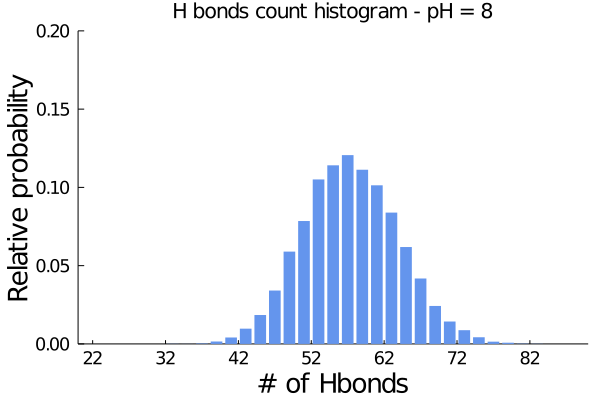

In [90]:
st = 2
    bin_nhb = collect(min_nhb:st:max_nhb)
    wgh_nhb = fill(1.0, length(nhb_eol_8))
    
    # Histograma ponderado
    Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_eol_8, bin_nhb, wgh_nhb, true, false);
    
    bar(Wbins_nhb, Whis_nhb,
        xlims = (min_nhb, max_nhb), ylims = (0, .2),
        xticks = min_nhb+st:10:max_nhb+st,
        linecolor = false, fillcolor = Colors.colorant"CornflowerBlue",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"),
        title = string("H bonds count histogram - pH = ", 8),
        yaxis = "Relative probability", xaxis = "# of Hbonds")

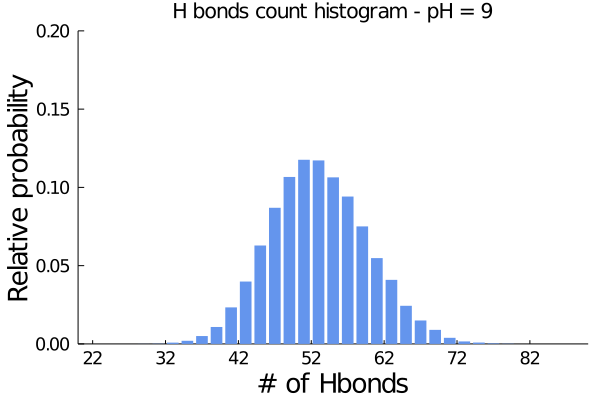

In [91]:
st = 2
    bin_nhb = collect(min_nhb:st:max_nhb)
    wgh_nhb = fill(1.0, length(nhb_eol_9))
    
    # Histograma ponderado
    Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_eol_9, bin_nhb, wgh_nhb, true, false);
    
    bar(Wbins_nhb, Whis_nhb,
        xlims = (min_nhb, max_nhb), ylims = (0, .2),
        xticks = min_nhb+st:10:max_nhb+st,
        linecolor = false, fillcolor = Colors.colorant"CornflowerBlue",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"),
        title = string("H bonds count histogram - pH = ", 9),
        yaxis = "Relative probability", xaxis = "# of Hbonds")

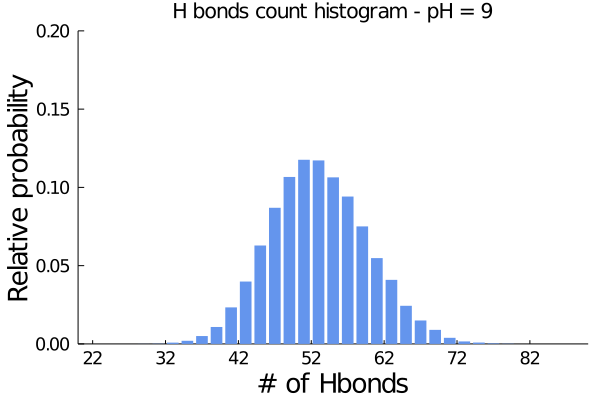

In [92]:
st = 2
    bin_nhb = collect(min_nhb:st:max_nhb)
    wgh_nhb = fill(1.0, length(nhb_eol_9))
    
    # Histograma ponderado
    Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_eol_9, bin_nhb, wgh_nhb, true, false);
    
    bar(Wbins_nhb, Whis_nhb,
        xlims = (min_nhb, max_nhb), ylims = (0, .2),
        xticks = min_nhb+st:10:max_nhb+st,
        linecolor = false, fillcolor = Colors.colorant"CornflowerBlue",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"),
        title = string("H bonds count histogram - pH = ", 9),
        yaxis = "Relative probability", xaxis = "# of Hbonds")

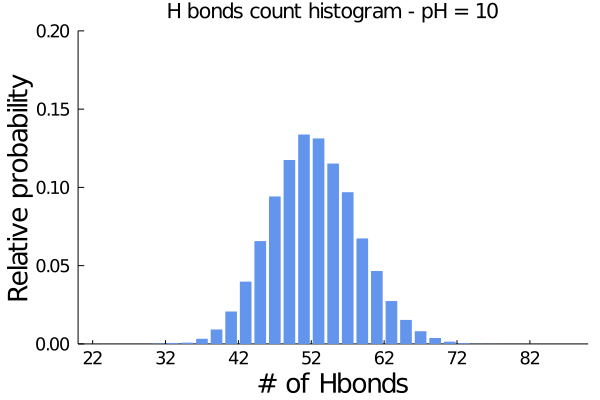

In [93]:
st = 2
    bin_nhb = collect(min_nhb:st:max_nhb)
    wgh_nhb = fill(1.0, length(nhb_eol_10))
    
    # Histograma ponderado
    Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_eol_10, bin_nhb, wgh_nhb, true, false);
    
    bar(Wbins_nhb, Whis_nhb,
        xlims = (min_nhb, max_nhb), ylims = (0, .2),
        xticks = min_nhb+st:10:max_nhb+st,
        linecolor = false, fillcolor = Colors.colorant"CornflowerBlue",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"),
        title = string("H bonds count histogram - pH = ", 10),
        yaxis = "Relative probability", xaxis = "# of Hbonds")

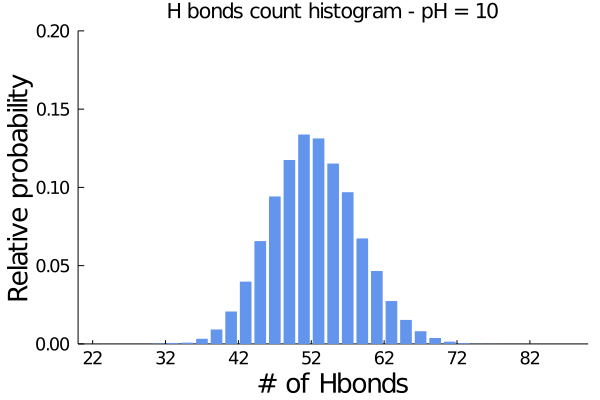

In [94]:
st = 2
    bin_nhb = collect(min_nhb:st:max_nhb)
    wgh_nhb = fill(1.0, length(nhb_eol_10))
    
    # Histograma ponderado
    Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_eol_10, bin_nhb, wgh_nhb, true, false);
    
    bar(Wbins_nhb, Whis_nhb,
        xlims = (min_nhb, max_nhb), ylims = (0, .2),
        xticks = min_nhb+st:10:max_nhb+st,
        linecolor = false, fillcolor = Colors.colorant"CornflowerBlue",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"),
        title = string("H bonds count histogram - pH = ", 10),
        yaxis = "Relative probability", xaxis = "# of Hbonds")

In [95]:
vals = vcat([ mean(nhb_eol_1) std(nhb_eol_1) std(nhb_eol_1) / mean(nhb_eol_1) ],
[ mean(nhb_eol_2) std(nhb_eol_2) std(nhb_eol_2) / mean(nhb_eol_2) ],
[ mean(nhb_eol_3) std(nhb_eol_3) std(nhb_eol_3) / mean(nhb_eol_3) ],
[ mean(nhb_eol_4) std(nhb_eol_4) std(nhb_eol_4) / mean(nhb_eol_4) ],
[ mean(nhb_eol_5) std(nhb_eol_5) std(nhb_eol_5) / mean(nhb_eol_5) ],
[ mean(nhb_eol_6) std(nhb_eol_6) std(nhb_eol_6) / mean(nhb_eol_6) ],
[ mean(nhb_eol_7) std(nhb_eol_7) std(nhb_eol_7) / mean(nhb_eol_7) ],
[ mean(nhb_eol_8) std(nhb_eol_8) std(nhb_eol_8) / mean(nhb_eol_8) ],
[ mean(nhb_eol_9) std(nhb_eol_9) std(nhb_eol_9) / mean(nhb_eol_9) ],
[ mean(nhb_eol_10) std(nhb_eol_10) std(nhb_eol_10) / mean(nhb_eol_10) ])

NamedArray(vals, (string.(idx), ["μ" ; "std" ; "μ/std"]))

10×3 Named Array{Float64,2}
A ╲ B │        μ       std     μ/std
──────┼─────────────────────────────
1     │  56.4228   6.43322  0.114018
2     │   57.161   6.52034   0.11407
3     │  54.8125   6.63533  0.121055
4     │  57.4852   6.55219   0.11398
5     │  56.4606   6.65775  0.117918
6     │  52.0744   6.29855  0.120953
7     │   55.378    6.9797  0.126037
8     │  56.9158   6.50521  0.114295
9     │  52.5125   6.67747   0.12716
10    │   51.877   5.93975  0.114497

## hbonds count por idx

In [106]:
nhb_cnt_eol_acc_phs = Array{Int64, 2}(undef, aa, 0)
nhb_cnt_eol_don_phs = Array{Int64, 2}(undef, aa, 0)

for ph in phs
    nhb_ser_eol_acc_ph = fill(0, (aa, nstlim))
    nhb_ser_eol_don_ph = fill(0, (aa, nstlim))
    
    temporal_acc = readdlm(joinpath(dir_eol_hbo, string(ph, "ph"),
        string("series_nhb_eol_gl4_as4_lys_acc_", ph)), header = true)
    
    temporal_don = readdlm(joinpath(dir_eol_hbo, string(ph, "ph"),
        string("series_nhb_eol_gl4_as4_lys_don_", ph)), header = true)
    
    res_hbo_eol_acc_phs = convert(Array{Bool, 2}, temporal_acc[1][:, 2:end])
    acceptor_donor_acc = convert(Array{String, 1}, temporal_acc[2][2:end])
    
    res_hbo_eol_don_phs = convert(Array{Bool, 2}, temporal_don[1][:, 2:end])
    acceptor_donor_don = convert(Array{String, 1}, temporal_don[2][2:end])
    

    for i = 1:nstlim
        mascara_acc = findall(res_hbo_eol_acc_phs[i, :])
        mascara_don = findall(res_hbo_eol_don_phs[i, :])
        
        for j in mascara_acc
            acceptor, donor = split(acceptor_donor_acc[j], "-")
            don = parse(Int64, split(split(donor, "_")[2], "@")[1])
            acc = parse(Int64, split(split(acceptor, "_")[2], "@")[1])
            nhb_ser_eol_acc_ph[don, i] += 1
            nhb_ser_eol_acc_ph[acc, i] += 1
        end
        
        for j in mascara_don
            acceptor, donor = split(acceptor_donor_don[j], "-")
            acc = parse(Int64, split(split(acceptor, "_")[2], "@")[1])
            don = parse(Int64, split(split(donor, "_")[2], "@")[1])
            nhb_ser_eol_don_ph[don, i] += 1
            nhb_ser_eol_don_ph[acc, i] += 1
        end
    end

    nhb_cnt_eol_acc_ph = mapslices(x -> sum(x), nhb_ser_eol_acc_ph, dims = 2)[:, 1]
    global nhb_cnt_eol_acc_phs = hcat(nhb_cnt_eol_acc_phs, nhb_cnt_eol_acc_ph)
    
    nhb_cnt_eol_don_ph = mapslices(x -> sum(x), nhb_ser_eol_don_ph, dims = 2)[:, 1]
    global nhb_cnt_eol_don_phs = hcat(nhb_cnt_eol_don_phs, nhb_cnt_eol_don_ph)
    
end

In [107]:
nhb_cnt_eol_phs = nhb_cnt_eol_acc_phs .+ nhb_cnt_eol_don_phs;

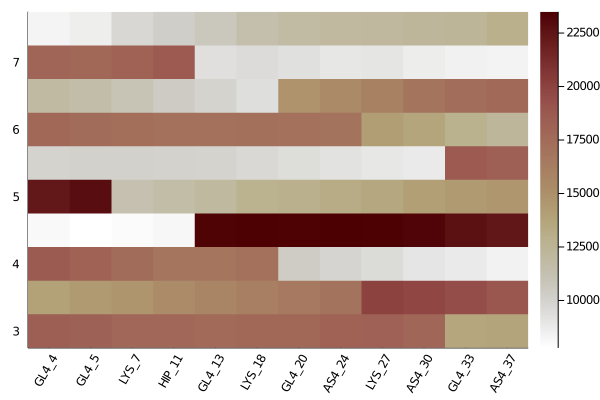

In [108]:
heatmap(titratable_residues[1:12], (phs ./ 10), nhb_cnt_eol_phs[titratable_resis[1:12], :],
    xrotation = 60, color = :bilbao)

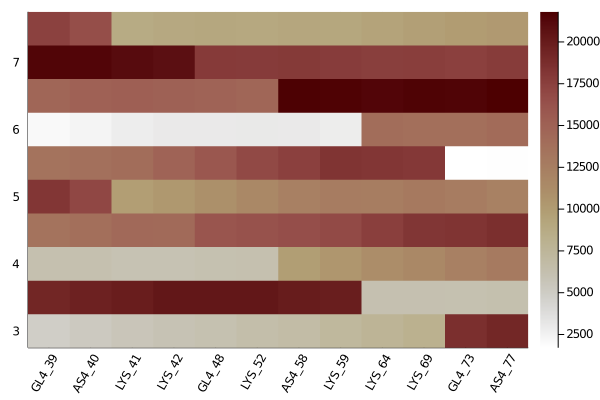

In [109]:
heatmap(titratable_residues[13:24], (phs ./ 10), nhb_cnt_eol_phs[titratable_resis[13:24], :],
    xrotation = 60, color = :bilbao)

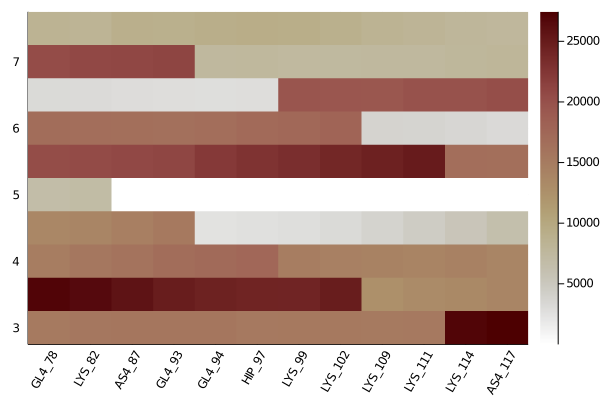

In [110]:
heatmap(titratable_residues[25:end], (phs ./ 10), nhb_cnt_eol_phs[titratable_resis[25:end], :],
    xrotation = 60, color = :bilbao)